In [1]:
# Import dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy import stats
import seaborn

In [2]:
# Create players dataframe
players_stats_df = pd.read_csv("player_stats.csv")
# drop irrelevant columns
players_stats_new = players_stats_df.drop(columns=['height', 'weight', 'DOB', 'mascot', 'position_id', 'team_id', 'id.1', 'region_id',
                                                   'rank', 'id'])
# rename columns
players_stats_new_df = players_stats_new.rename(
    columns={'name': 'Player_Name', 'name.1': 'Team_Name'})
players_stats_new_df.tail()

,player_id,game_id,Min,FGM,FGA,3PA,3PM,FTA,FTM,OREB,REB,AST,ST,BLK,Turnover,PF,PTS,Player_Name,Team_Name
52,12,5,39,6.0,14,2,2,8,7,0,8,1,1,0,2,3,21,Malik Newman,Kansas
53,13,5,39,9.0,18,8,3,2,1,0,3,3,2,0,3,1,23,Devonte Graham,Kansas
54,15,5,18,0.0,4,2,0,0,0,0,2,1,0,0,0,0,0,Marcus Garrett,Kansas
55,11,5,32,4.0,7,2,0,0,0,0,2,0,1,0,0,1,8,Lagerald Vick,Kansas
56,14,5,29,2.0,8,4,1,6,5,1,2,3,1,0,1,2,10,Sviatoslav Mykhailiuk,Kansas


In [3]:
# create team data frames
Villanova_df = pd.read_csv("vill_team_stats.csv")
Loyola_df = pd.read_csv("Loyola_team_stats.csv")
Michigan_df = pd.read_csv("Michigan_team_stats.csv")
Kansas_df = pd.read_csv("Kansas_team_stats.csv")
three_df = pd.read_csv("threes_players_stats.csv")

In [4]:
# Add columns for field goal (FG), Three point (3PT) Freethrow (FT) %, etc measurements of interest
Villanova_df['FG%'] = Villanova_df['FGM']/Villanova_df['FGA']*100
Villanova_df['3PT%'] = Villanova_df['3PM']/Villanova_df['3PA']*100
Villanova_df['FT%'] = Villanova_df['FTM']/Villanova_df['FTA']*100
Villanova_df['Total REB'] = Villanova_df['OREB']+Villanova_df['REB']

Loyola_df['FG%'] = Loyola_df['FGM']/Loyola_df['FGA']*100
Loyola_df['3PT%'] = Loyola_df['3PM']/Loyola_df['3PA']*100
Loyola_df['FT%'] = Loyola_df['FTM']/Loyola_df['FTA']*100
Loyola_df['Total REB'] = Loyola_df['OREB']+Loyola_df['REB']

Michigan_df['FG%'] = Michigan_df['FGM']/Michigan_df['FGA']*100
Michigan_df['3PT%'] = Michigan_df['3PM']/Michigan_df['3PA']*100
Michigan_df['FT%'] = Michigan_df['FTM']/Michigan_df['FTA']*100
Michigan_df['Total REB'] = Michigan_df['OREB'] + Michigan_df['REB']

Kansas_df['FG%'] = Kansas_df['FGM']/Kansas_df['FGA']*100
Kansas_df['3PT%'] = Kansas_df['3PM']/Kansas_df['3PA']*100
Kansas_df['FT%'] = Kansas_df['FTM']/Kansas_df['FTA']*100
Kansas_df['Total REB'] = Kansas_df['OREB'] + Kansas_df['REB']

Kansas_df

,team_id,game_id,FGM,FGA,3PA,3PM,FTA,FTM,OREB,REB,AST,ST,BLK,Turnover,PF,PTS,FG%,3PT%,FT%,Total REB
0,1,5,28,62,18,6,20,16,7,30,8,5,1,8,12,79,45.16129,33.333333,80.0,37


In [5]:
# Create variables for performance measurements
kansas_ft = Kansas_df['FT%'][0]
kansas_fg = Kansas_df['FG%'][0]
kansas_3pt = Kansas_df['3PT%'][0]
kansas_reb = Kansas_df['Total REB'][0]
kansas_st = Kansas_df['ST'][0]
kansas_blk = Kansas_df['BLK'][0]
kansas_ast = Kansas_df['AST'][0]
kansas_to = Kansas_df['Turnover'][0]

Michigan_ft = Michigan_df['FT%'][0]
Michigan_fg = Michigan_df['FG%'][0]
Michigan_3pt = Michigan_df['3PT%'][0]
Michigan_reb = Michigan_df['Total REB'][0]
Michigan_st = Michigan_df['ST'][0]
Michigan_blk = Michigan_df['BLK'][0]
Michigan_ast = Michigan_df['AST'][0]
Michigan_to = Michigan_df['Turnover'][0]

Loyola_ft = Loyola_df['FT%'][0]
Loyola_fg = Loyola_df['FG%'][0]
Loyola_3pt = Loyola_df['3PT%'][0]
Loyola_reb = Loyola_df['Total REB'][0]
Loyola_st = Loyola_df['ST'][0]
Loyola_blk = Loyola_df['BLK'][0]
Loyola_ast = Loyola_df['AST'][0]
Loyola_to = Loyola_df['Turnover'][0]


Villanova_ft = Villanova_df['FT%'][0]
Villanova_fg = Villanova_df['FG%'][0]
Villanova_3pt = Villanova_df['3PT%'][0]
Villanova_reb = Villanova_df['Total REB'][0]
Villanova_st = Villanova_df['ST'][0]
Villanova_blk = Villanova_df['BLK'][0]
Villanova_ast = Villanova_df['AST'][0]
Villanova_to = Villanova_df['Turnover'][0]

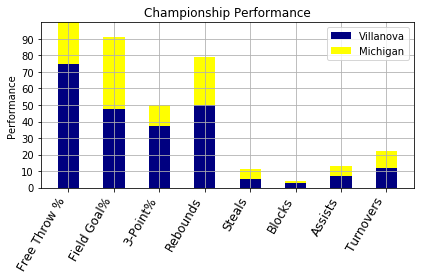

In [6]:
# Assign variables for performance plotting
N = 8
villPerforamnce = (Villanova_ft, Villanova_fg, Villanova_3pt, Villanova_reb,
                   Villanova_st, Villanova_blk, Villanova_ast, Villanova_to)
MichPerforamnce = (Michigan_ft, Michigan_fg, Michigan_3pt, Michigan_reb,
                   Michigan_st, Michigan_blk, Michigan_ast, Michigan_to)
kansasPerforamnce = (kansas_ft, kansas_fg, kansas_3pt,
                     kansas_reb, kansas_st, kansas_blk, kansas_ast, kansas_to)
LoyolaPerforamnce = (Loyola_ft, Loyola_fg, Loyola_3pt,
                     Loyola_reb, Loyola_st, Loyola_blk, Loyola_ast, Loyola_to)

ind = np.arange(N)
width = 0.47

# Create championship Stacked bar chart
p1 = plt.bar(ind, villPerforamnce, width, color='navy')
p2 = plt.bar(ind, MichPerforamnce, width,
             bottom=villPerforamnce, color='yellow')
plt.ylim(0, 100)
plt.ylabel('Performance')
plt.title('Championship Performance')
tick_locations = [value for value in ind]
plt.xticks(ind, ('Free Throw %', 'Field Goal%', '3-Point%', 'Rebounds', 'Steals', 'Blocks', 'Assists', 'Turnovers',), rotation=60,
           fontsize=12, horizontalalignment="right")
plt.grid(True)
plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('Villanova', 'Michigan'))
plt.tight_layout()
plt.savefig("championship_performance.png")

plt.show()

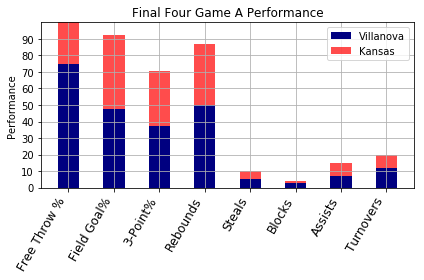

In [7]:
# Create final four game 1 Stacked bar chart
ind = np.arange(N)
width = 0.47

# Create championship Stacked bar chart

p1 = plt.bar(ind, villPerforamnce, width, color='navy')
p2 = plt.bar(ind, kansasPerforamnce, width,
             bottom=villPerforamnce, color='red', alpha=0.7)

plt.ylim(0, 100)
plt.ylabel('Performance')
plt.title('Final Four Game A Performance')
tick_locations = [value for value in ind]
plt.xticks(ind, ('Free Throw %', 'Field Goal%', '3-Point%', 'Rebounds', 'Steals', 'Blocks', 'Assists', 'Turnovers',), rotation=60,
           fontsize=12, horizontalalignment="right")
plt.grid(True)
plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('Villanova', 'Kansas'))
plt.tight_layout()
plt.savefig("final_four_A_performance.png")

plt.show()

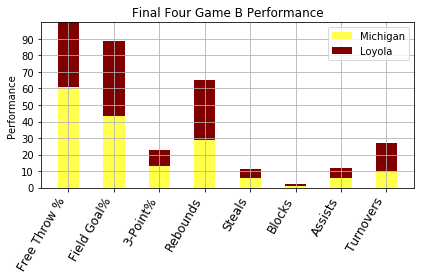

In [8]:
ind = np.arange(N)
width = 0.47

# Create championship Stacked bar chart

p1 = plt.bar(ind, MichPerforamnce, width, color='yellow', alpha=0.7)
p2 = plt.bar(ind, LoyolaPerforamnce, width,
             bottom=MichPerforamnce, color='maroon', alpha=1)

plt.ylim(0, 100)
plt.ylabel('Performance')
plt.title('Final Four Game B Performance')
tick_locations = [value for value in ind]
plt.xticks(ind, ('Free Throw %', 'Field Goal%', '3-Point%', 'Rebounds', 'Steals', 'Blocks', 'Assists', 'Turnovers',), rotation=60,
           fontsize=12, horizontalalignment="right")
plt.grid(True)
plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('Michigan', 'Loyola'))
plt.tight_layout()
plt.savefig("final_four_B_performance.png")

plt.show()

In [9]:
players_stats_new_df = players_stats_new_df.fillna(value=0)
players_stats_new_df['Total Shot Attempts'] = players_stats_new_df['FGA'] +  players_stats_new_df['3PA'] + players_stats_new_df['FTA']

players_stats_new_df['Team_Name'].unique()

array(['Villanova', 'Michigan', 'Loyola', 'Kansas'], dtype=object)

In [10]:
team_vill = players_stats_new_df[players_stats_new_df["Team_Name"] == "Villanova"]
team_mich = players_stats_new_df[players_stats_new_df["Team_Name"] == "Michigan"]
team_kan = players_stats_new_df[players_stats_new_df["Team_Name"] == "Kansas"]
team_loy = players_stats_new_df[players_stats_new_df["Team_Name"] == "Loyola"]

team_loy.columns

Index(['player_id', 'game_id', 'Min', 'FGM', 'FGA', '3PA', '3PM', 'FTA', 'FTM',
       'OREB', 'REB', 'AST', 'ST', 'BLK', 'Turnover', 'PF', 'PTS',
       'Player_Name', 'Team_Name', 'Total Shot Attempts'],
      dtype='object')

### Analysis Question: Do teams with more Freethrow attempts tend to score more overall points?

In [11]:
# Assign variables to study relationship
points_vill = team_vill['PTS']
ft_attm_vill = team_vill['FTA']
to_vill = team_vill['Turnover']
min_vill = team_vill['Min']
total_attm_vill = team_vill['Total Shot Attempts']
three_makes_vill = team_vill['3PM'].sum()
fg_makes_vill = team_vill['FGM'].sum()
ft_makes_vill = team_vill['FTM'].sum()

points_mich = team_mich['PTS']
ft_attm_mich = team_mich['FTA']
to_mich = team_vill['Turnover']
min_mich = team_mich['Min']
total_attm_mich = team_mich['Total Shot Attempts']
three_makes_mich = team_mich['3PM']
fg_makes_mich = team_mich['FGM']
ft_makes_mich = team_mich['FTM']

points_kan = team_kan['PTS']
ft_attm_kan = team_kan['FTA']
to_kan = team_kan['Turnover']
min_kan = team_kan['Min']
total_attm_kan = team_kan['Total Shot Attempts']
three_makes_kan = team_kan['3PM']
fg_makes_kan = team_kan['FGM']
ft_makes_kan = team_kan['FTM']

points_loy = team_loy['PTS']
ft_attm_loy = team_loy['FTA']
to_loy = team_loy['Turnover']
min_loy = team_loy['Min']
total_attm_loy = team_loy['Total Shot Attempts']
three_makes_loy = team_loy['3PM']
fg_makes_loy = team_loy['FGM']
ft_makes_loy = team_loy['FTM']



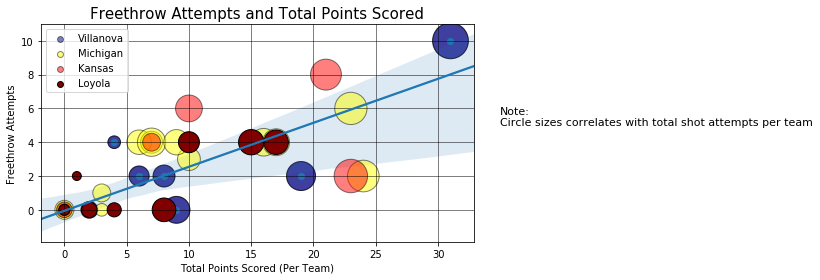

In [19]:
fig = plt.figure(figsize = (13,4))

ax = fig.add_subplot(121)

ax.scatter(points_vill, ft_attm_vill, s = total_attm_vill*40, marker = "o", label = "Villanova",
           color ="navy", alpha =.5, edgecolors = "black", linewidth = 1)
seaborn.regplot(x=points_vill, y=ft_attm_vill)

ax.scatter(points_mich, ft_attm_mich, s = total_attm_mich*40, marker = "o", label = "Michigan",
           color ="yellow", alpha =.5, edgecolors = "black", linewidth = 1)

ax.scatter(points_kan, ft_attm_kan, s = total_attm_kan*40, marker = "o", label = "Kansas",
           color ="red", alpha =.5, edgecolors = "black", linewidth = 1)

ax.scatter(points_loy, ft_attm_loy, s = total_attm_loy*40, marker = "o", label = "Loyola",
           color ="maroon", alpha =1.0, edgecolors = "black", linewidth = 1)


ax.grid(b=True, which='major', color='black', linestyle='-', linewidth=0.5)

plt.xlabel("Total Points Scored (Per Team)")

plt.ylabel("Freethrow Attempts")

plt.title("Freethrow Attempts and Total Points Scored",  fontsize=15)



lgnd = plt.legend(loc="upper left")

lgnd.legendHandles[0]._sizes = [35]

lgnd.legendHandles[1]._sizes = [35]

lgnd.legendHandles[2]._sizes = [35]

lgnd.legendHandles[3]._sizes = [35]


plt.tight_layout()

plt.text(35,5,"Note:\nCircle sizes correlates with total shot attempts per team", fontsize=11)

plt.show()

fig.savefig("pts_FT.png")

# Analysis Question: Final Four Game A turnovers to overall points?

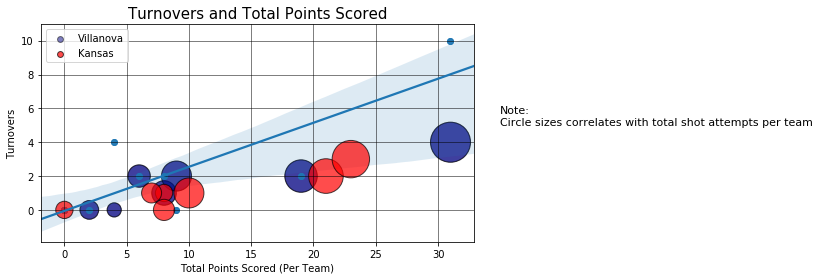

In [13]:
fig = plt.figure(figsize = (13,4))

ax = fig.add_subplot(121)

ax.scatter(points_vill, to_vill, s = total_attm_vill*50, marker = "o", label = "Villanova",
           color ="navy", alpha =.5, edgecolors = "black", linewidth = 1)
seaborn.regplot(x=points_vill, y=ft_attm_vill)

#ax.scatter(points_mich, to_mich, s = total_attm_mich*40, marker = "o", label = "Michigan",
 #         color ="yellow", alpha =.5, edgecolors = "black", linewidth = 1)

ax.scatter(points_kan, to_kan, s = total_attm_kan*50, marker = "o", label = "Kansas",
           color ="red", alpha =.7, edgecolors = "black", linewidth = 1)

#ax.scatter(points_loy, to_attm_loy, s = total_attm_loy*40, marker = "o", label = "Loyola",
#          color ="maroon", alpha =1.0, edgecolors = "black", linewidth = 1)


ax.grid(b=True, which='major', color='black', linestyle='-', linewidth=0.5)

plt.xlabel("Total Points Scored (Per Team)")

plt.ylabel("Turnovers")

plt.title("Turnovers and Total Points Scored",  fontsize=15)



lgnd = plt.legend(loc="upper left")

lgnd.legendHandles[0]._sizes = [35]

lgnd.legendHandles[1]._sizes = [35]

#lgnd.legendHandles[2]._sizes = [35]

#lgnd.legendHandles[3]._sizes = [35]


plt.tight_layout()

plt.text(35,5,"Note:\nCircle sizes correlates with total shot attempts per team", fontsize=11)

plt.show()

fig.savefig("pts_to.png")

# START HERE

# Productivity measurement - Mins to Points

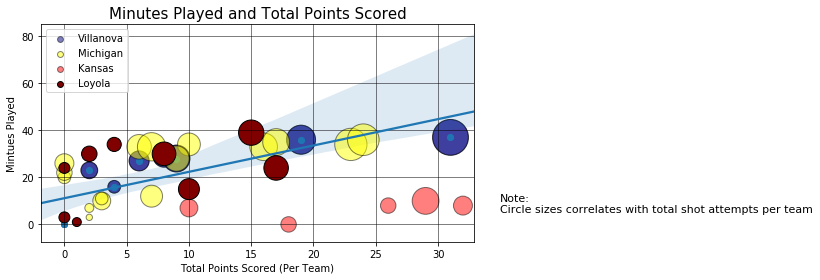

In [14]:
fig = plt.figure(figsize = (13,4))

ax = fig.add_subplot(121)

ax.scatter(points_vill, min_vill, s = total_attm_vill*40, marker = "o", label = "Villanova",
           color ="navy", alpha =.5, edgecolors = "black", linewidth = 1)
seaborn.regplot(x=points_vill, y=min_vill)

ax.scatter(points_mich, min_mich, s = total_attm_mich*40, marker = "o", label = "Michigan",
           color ="yellow", alpha =.5, edgecolors = "black", linewidth = 1)

ax.scatter(min_kan, points_kan, s = total_attm_kan*40, marker = "o", label = "Kansas",
           color ="red", alpha =.5, edgecolors = "black", linewidth = 1)

ax.scatter(points_loy, min_loy,s = total_attm_loy*40, marker = "o", label = "Loyola",
           color ="maroon", alpha =1.0, edgecolors = "black", linewidth = 1)


ax.grid(b=True, which='major', color='black', linestyle='-', linewidth=0.5)

plt.xlabel("Total Points Scored (Per Team)")

plt.ylabel("Mintues Played")

plt.title("Minutes Played and Total Points Scored",  fontsize=15)



lgnd = plt.legend(loc="upper left")

lgnd.legendHandles[0]._sizes = [35]

lgnd.legendHandles[1]._sizes = [35]

lgnd.legendHandles[2]._sizes = [35]

lgnd.legendHandles[3]._sizes = [35]


plt.tight_layout()

plt.text(35,5,"Note:\nCircle sizes correlates with total shot attempts per team", fontsize=11)

plt.show()

fig.savefig("pts_FT.png")

In [15]:
# When we attempt a shot, how often did we missed the shot, often did we get the offensive rebound?

# missed_shot = shot_attempt - shot_make

In [16]:
# Shot selection
# % of FTM, FGM, 3PM of total Points

In [17]:
team_loy.columns

Index(['player_id', 'game_id', 'Min', 'FGM', 'FGA', '3PA', '3PM', 'FTA', 'FTM',
       'OREB', 'REB', 'AST', 'ST', 'BLK', 'Turnover', 'PF', 'PTS',
       'Player_Name', 'Team_Name', 'Total Shot Attempts'],
      dtype='object')

In [18]:
fig = plt.figure()

labels = ["FTM", "FGM", "3PM"]

sizes = [ft_makes_vill, fg_makes_vill, three_makes_vill]

colors = ["navy", "dodgerblue", "darkgrey"]

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct ="%1.1f%%", shadow = True, startangle = 90,pctdistance=0.3,wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True, })



plt.title("% of Total Drivers by City Type")


#plt.savefig("Images_Results/Drivers_by_CityType.png")

NameError: name 'explode' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()

labels = ["FTM", "FGM", "3PM"]

sizes = [ft_makes_vill, fg_makes_vill, three_makes_vill]

colors = ["navy", "dodgerblue", "darkgrey"]

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct ="%1.1f%%", shadow = True, textprops=dict(color="w"),counterclock=False, 
                 startangle=90, 
                 wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})


plt.title("% of Total Drivers by City Type")
plt.setp(autotexts, size=10, weight="bold")

plt.show()

#plt.savefig("Images_Results/Drivers_by_CityType.png")

In [ ]:
pie_chart_labels = ('Failed', 'Passed', 'Disabled')
pie_chart_colors = ('red', 'green', 'grey')
pie_chart_exploded = (0, 0.08, 0)
pie_chart_fig, pie_chart_ax = plt.subplots()
pie_chart_ax.margins(0.05)
pie_chart_ax.axis('equal')
pie_chart_test_results = (ft_makes_vill, fg_makes_vill, three_makes_vill)

pie_chart_ax.pie(pie_chart_test_results, 
                 explode=pie_chart_exploded, 
                 labels=pie_chart_labels,     
                 colors=pie_chart_colors, 
                 shadow=True, 
                 counterclock=False, 
                 startangle=90, 
                 wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

shot_selection = [ft_makes_vill, fg_makes_vill, three_makes_vill]

data = [float(x.split()[0]) for x in shot_selection]
points = [x.split()[-1] for x in shot_selection]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Vill Shot Selection",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

# STOP HERE

## Code calculates Field Goals (FGs) taken per team



In [ ]:
villanova_three = three_df[three_df["Team"] == "Villanova"]

michigan_three = three_df[three_df["Team"] == "Michigan"]

kansas_three = three_df[three_df["Team"] == "Kansas"]

loyola_three = three_df[three_df["Team"] == "Loyola"]

In [ ]:
villanova_three

# Code Calcuates Count of players who attempted threes

In [ ]:
count_three_villanova = villanova_three.groupby("Team")["Three_Attempts"].sum()

count_three_michigan = michigan_three.groupby("Team")["Three_Attempts"].sum()

count_three_kansas = kansas_three.groupby("Team")["Three_Attempts"].sum()

count_three_loyola = loyola_three.groupby("Team")["Three_Attempts"].sum()


print("Total three count vill {}".format(count_three_villanova.sum()))

print("Total three count michigan {}".format(count_three_michigan.sum()))

print("Total three count kansas {}".format(count_three_kansas.sum()))

print("Total three count loyola {}".format(count_three_loyola.sum()))


In [ ]:
# avg 3s taken per team

avg_three_villanova = villanova_three.groupby("Team").mean()["Three_Attempts"]
avg_three_michigan = michigan_three.groupby("Team").mean()["Three_Attempts"]
avg_three_kansas = kansas_three.groupby("Team").mean()["Three_Attempts"]
avg_three_loyola = loyola_three.groupby("Team").mean()["Three_Attempts"]

print("Total avg threes taken villanova {} ".format(avg_three_villanova.mean()))
print("Total avg threes taken michigan {} ".format(avg_three_michigan.mean()))
print("Total avg threes taken kansas {} ".format(avg_three_kansas.mean()))
print("Total avg threes taken loyola {} ".format(avg_three_loyola.mean()))

In [ ]:
sum_three_villanova  = villanova_three.groupby("Team")["Player"].sum()
sum_three_michigan  = michigan_three.groupby("Team")["Team"].count()
sum_three_loyola  = loyola_three.groupby("Team")["Team"].count()
sum_three_kansas  = kansas_three.groupby("Team")["Team"].count()

print("Sum threes attempted villanova {}".format(sum_three_villanova.count()))
print("Sum threes attempted michigan {}".format(sum_three_michigan.count()))
print("Sum threes attempted loyola {}".format(sum_three_loyola.count()))
print("Sum threes attempted kansas  {}".format(sum_three_kansas.count()))

In [ ]:
total_threes = three_df['Three_Attempts'].sum()
avg_threes = three_df['Three_Attempts'].mean()
count_threes = three_df['Three_Attempts'].count()

In [ ]:
count_threes 

In [ ]:
x = total_threes
y = avg_threes


plt.scatter(x,y, alpha = 0.4, color = "navy", edgecolors="black", linewidth=1)
plt.xlabel("the x AXIS")
plt.ylabel("the y AXIS")
plt.title("The title")
plt.grid(True)

plt.show()

In [ ]:
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z = z*z

plt.scatter(x,y, s=z*2000, alpha = 0.4, color = "navy", edgecolors="black", linewidth=1)
plt.xlabel("the x AXIS")
plt.ylabel("the y AXIS")
plt.title("The title")
plt.grid(True)

plt.show()

In [ ]:
fig = plt.figure(figsize = (10,3))

ax = fig.add_subplot(121)

ax.scatter(count_three_villanova, avg_three_villanova, s = sum_three_villanova*10, marker = "o", label = "Villanova",
           color ="navy", alpha =.8, edgecolors = "black", linewidth = 1)

ax.scatter(count_three_michigan, avg_three_michigan, s = sum_three_michigan*10, marker = "o", label = "Michigan",
           color ="yellow", alpha =.7, edgecolors = "black", linewidth = 1)

ax.scatter(count_three_loyola, avg_three_loyola, s = sum_three_loyola*10, marker = "o", label = "Loyola",
           color ="maroon", alpha =.8, edgecolors = "black", linewidth = 1)

ax.scatter(count_three_kansas, avg_three_kansas, s = sum_three_kansas*10, marker = "o", label = "Kansas",
           color ="red", alpha =.7, edgecolors = "black", linewidth = 1)

plt.xlabel("Total Number of Rides (Per City)")

plt.ylabel("Average Fare ($)")

plt.title("Pyber Ride Sharing Data (2018)")

lgnd = plt.legend()

lgnd.legendHandles[0]._sizes = [30]

lgnd.legendHandles[1]._sizes = [30]

lgnd.legendHandles[2]._sizes = [30]

plt.grid()

plt.text(60,5,"Note:\nCircle sizes correlates with driver count per city", fontsize=13)

plt.show()


In [ ]:

count_three_urban =  urban_city.groupby("city")["driver_count"].first()

count_drivers_rural =  rural_city.groupby("city")["driver_count"].first()

count_drivers_suburban = suburban_city.groupby("city")["driver_count"].first()

print("Total driver count Urban {} ".format(count_drivers_urban.sum()))

print("Total driver count Rural {}".format(count_drivers_rural.sum()))

print("Total driver count Suburban {}".format(count_drivers_suburban.sum()))

# stop here
count_drivers_urban =  urban_city.groupby("city")["driver_count"].first()

count_drivers_rural =  rural_city.groupby("city")["driver_count"].first()

count_drivers_suburban = suburban_city.groupby("city")["driver_count"].first()

print("Total driver count Urban {} ".format(count_drivers_urban.sum()))

print("Total driver count Rural {}".format(count_drivers_rural.sum()))

print("Total driver count Suburban {}".format(count_drivers_suburban.sum()))

In [ ]:
# shot selection stats

# 3 pointers taken

In [ ]:
# FTs taken

In [ ]:
# field goals taken

In [ ]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
def bar_all_team(Total_stat1, Total_stat2, Total_stat3, x_axis, x_ticks):
    fig = plt.figure(figsize=(18, 8))

    team_name = ['Villanova', 'Michigan', 'Kansas']
    width = .60
    # Draw the bar plot for the 3 cities. Assign the color of the plot to one of the flag colors of that city
    plt.bar(x_axis, Total_stat1, color='blue',
            width=width, edgecolor='black', align='center')
    plt.bar(x_axis, Total_stat2, color='yellow',
            bottom=Total_stat1, width=width, edgecolor='black', align='center')
    plt.bar(x_axis, Total_stat3, color='red',
            bottom=Total_stat2, width=width, edgecolor='black', align='center')

    # Create the ticks for our bar chart's x axis
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, x_ticks, rotation=65,
               fontsize=10, horizontalalignment="right")
    plt.legend(team_name, loc='upper right',
               edgecolor='black', title='Final Four Teams')